# Univariate Analysis

This notebook performs univariate analysis on the customer segmentation dataset. We'll first load the stored variables from our setup notebook.

In [2]:
%store -r

print("Project configuration:")
print(f"SLUG = {SLUG}")
print(f"DATA_DIR = {DATA_DIR}")
print(f"DATASET_KEY = {DATASET_KEY}")
print(f"FIG_DIR = {FIG_DIR}")
print(f"REP_DIR = {REP_DIR}")
print(f"NOTEBOOK_DIR = {NOTEBOOK_DIR}")

missing_vars = [var for var in ['SLUG', 'DATA_DIR', 'FIG_DIR', 'REP_DIR', 'NOTEBOOK_DIR', 'DATASET_KEY'] if var not in globals()]
print(f"Vars not found in globals: {missing_vars}")

# Set default values if variables are not found in store or are empty
if not SLUG:  # Check if empty string
    print(f"{SLUG=} is empty, initializing everything explicitly")
    SLUG = 'customer-segmentation'
    DATASET_KEY = 'vjchoudhary7/customer-segmentation-tutorial-in-python'
    GIT_ROOT = Path.cwd().parent.parent
    DATA_DIR = GIT_ROOT / 'data' / SLUG
    FIG_DIR = GIT_ROOT / 'figures' / SLUG
    REP_DIR = GIT_ROOT / 'reports' / SLUG
    NOTEBOOK_DIR = GIT_ROOT / 'notebooks' / SLUG


Project configuration:
SLUG = customer-segmentation
DATA_DIR = /Users/ravisharma/workdir/eda_practice/data/customer-segmentation
DATASET_KEY = vjchoudhary7/customer-segmentation-tutorial-in-python
FIG_DIR = /Users/ravisharma/workdir/eda_practice/figures/customer-segmentation
REP_DIR = /Users/ravisharma/workdir/eda_practice/reports/customer-segmentation
NOTEBOOK_DIR = /Users/ravisharma/workdir/eda_practice/notebooks/customer-segmentation
Vars not found in globals: []


In [3]:
from pathlib import Path
import pandas as pd


In [4]:
# Downloading data

base_df = pd.DataFrame()

CSV_PATH = Path(DATA_DIR) / "Mall_Customers.csv"
if not CSV_PATH.exists:
    print(f"CSV {CSV_PATH} does not exist. base_df will remain empty.")
else:
    base_df = pd.read_csv(CSV_PATH)
    print(f"CSV {CSV_PATH} loaded successfully.")

base_df.head()

CSV /Users/ravisharma/workdir/eda_practice/data/customer-segmentation/Mall_Customers.csv loaded successfully.


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
base_df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
base_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Analysis Planned
0. Check feature types
   - Identify numerical vs categorical features
   - Create lists for each type

Numerical analyses
1. Descriptive statistics
   - Basics (mean, median, std)
   - Skewness
   - Kurtosis
   - Quantiles

2. Distribution shape tests
   - Shapiro–Wilk
   - D'Agostino–Pearson
   - Jarque–Bera
   - Anderson–Darling

3. Outlier detection
   - IQR method
   - Z-score
   - Modified Z-score (robust)
   - Isolation Forest
   - Local Outlier Factor

4. Visualizations (save to figures/`$slug`/univariate)
   - Histogram
   - KDE / histplot + KDE
   - Violin plot (box + density)
   - Q–Q plot
   - Density plot

Notes
- Keep plots and outputs reproducible (seed where applicable)
- Store generated figures under: `figures/<SLUG>/univariate`

In [7]:
analysis_results = {}

In [8]:
base_df.dtypes
numerical_features = base_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = base_df.select_dtypes(include=['object']).columns.tolist()
datetime_features = base_df.select_dtypes(include=['datetime64']).columns.tolist()
id_column = 'CustomerID'
print(f"{numerical_features=}")
print(f"{categorical_features=}")
print(f"{datetime_features=}")
print(f"{id_column=}")
print("Dropping id columns...")
numerical_features.remove(id_column)
print(f"{numerical_features=}")

numerical_features=['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
categorical_features=['Gender']
datetime_features=[]
id_column='CustomerID'
Dropping id columns...
numerical_features=['Age', 'Annual Income (k$)', 'Spending Score (1-100)']


In [9]:
missing_data = base_df.isnull().sum() # a dataframe
missing_data_pct = missing_data / len(base_df) * 100 # a dataframe with operation done column wise
print(f"{missing_data=}")
print(f"{missing_data_pct=}")

missing_data=CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
missing_data_pct=CustomerID                0.0
Gender                    0.0
Age                       0.0
Annual Income (k$)        0.0
Spending Score (1-100)    0.0
dtype: float64


In [10]:
analysis_results['dataset'] = {
    "missing_data": missing_data.to_dict(),
    "missing_data_pct": missing_data_pct.to_dict(),
    "numerical_features": numerical_features,
    "categorical_features": categorical_features,
    "datetime_features": datetime_features,
    "shape": base_df.shape
}

In [40]:
base_df['Age'].agg(['count', 'mean', 'median', 'std', 'var', 'min', 'max', 'skew', 'kurtosis'])

count       200.000000
mean         38.850000
median       36.000000
std          13.969007
var         195.133166
min          18.000000
max          70.000000
skew          0.485569
kurtosis     -0.671573
Name: Age, dtype: float64

In [11]:
from scipy import stats
print(stats.skew(base_df['Age']), stats.kurtosis(base_df['Age']))
# base_df['Age'].quantile([0.25, 0.5, 0.75, 0.95, 0.99])

0.48191947090957177 -0.6847513947723236


In [12]:
base_df['Age'].mode()

0    32
Name: Age, dtype: int64

In [15]:
stats.shapiro(base_df['Age']) 


ShapiroResult(statistic=np.float64(0.9516182290435916), pvalue=np.float64(2.710855723091295e-06))

### Normality Test Function
##### How They Work Together in Your Code
The goal of your plot_normality_test_v2 function is to assess if the Age data is "normally distributed". By plotting the two together, you can immediately see how well your data fits the ideal:

- If the histogram bars closely follow the shape of the red line, it's a strong visual indicator that your data is approximately normal.
- If the histogram is skewed, has multiple peaks, or is much flatter/pointier than the red line, it shows that your data deviates significantly from a normal distribution. This visual evidence is then confirmed by the statistical Shapiro-Wilk test at the end of the function.

**In short**: The histogram shows what you have, and the normal distribution curve shows what a perfect version would look like.

Here is a detailed breakdown of the Shapiro-Wilk test, addressing your questions about the W statistic and the p-value.

### 1. How is the test statistic (W) of the Shapiro-Wilk test calculated?

The W statistic is a measure of how well the ordered sample data fits the expected values of a normal distribution. Conceptually, it's a ratio that compares two different estimates of the population variance, both calculated from your sample data.

The formula is:

```plaintext
      (Σ aᵢ * xᵢ)²
W = -----------------
      Σ (xᵢ - x̄)²
```

Let's break down the components:

- xᵢ: These are your data points, sorted in ascending order.
- x̄: This is the mean (average) of your data points.
- Denominator Σ (xᵢ - x̄)²: This is the standard sum of squared differences from the mean, which is proportional to the usual sample variance. It represents the total spread in your data.
- Numerator (Σ aᵢ * xᵢ)²: This is the more complex part. It's a weighted sum of your ordered data points.
- The coefficients aᵢ are special constants derived from the expected values of order statistics of a standard normal distribution.
Essentially, these aᵢ values represent the "ideal" spacing you'd expect for data points drawn from a perfect normal distribution.

This numerator provides an alternative estimate of the population variance, but one that is highly sensitive to whether the data's shape is truly normal.

The W statistic will always be between 0 and 1.

### 2. How is the p-value calculated?

The p-value is not calculated from a simple, direct formula. Instead, it's determined by comparing your calculated W statistic to the sampling distribution of W.

Here's the process:

- Statisticians have figured out the full range of possible W values you could get for a given sample size if the data were truly from a normal distribution. This is the "distribution of W under the null hypothesis."
- Your calculated W statistic is a single point on this distribution.
- The **p-value** is the probability of obtaining a W statistic that is as **low as, or lower than**, the one you actually calculated, assuming the data is normal.

In practice, statistical software like scipy uses complex algorithms and pre-computed tables to find this probability for you.

### 3. How do we interpret the W and p-values together?

The W statistic and the p-value provide complementary information and should be interpreted together:

- **W Statistic (The "What"):** It tells you what the fit is like. It measures the strength of the correlation between your data and the ideal normal data.
    - A W value close to 1 indicates a very good fit to a normal distribution.
    - A W value far from 1 (and closer to 0) indicates a poor fit.
- **p-value (The "So What"):** It tells you if the deviation from a perfect fit is statistically significant. It answers, "Is the W value low enough for us to confidently say the data is not normal?"
    - **A high p-value (e.g., p > 0.05)** means that even if W isn't exactly 1, the deviation is small enough that it could have easily happened by random chance. You fail to reject the null hypothesis (that the data is normal).
    - **A low p-value (e.g., p < 0.05)** means that the deviation from normality is too large to be just random chance. You reject the null hypothesis and conclude the data is not normally distributed.

**In short:** The W value measures the degree of normality, and the p-value tells you if any lack of normality is significant.

### 4. Can the value of one control the value of another? Is there a relationship?

Yes, there is a direct and inverse relationship between the W statistic and the p-value. The p-value is derived directly from the W statistic (and the sample size).

- **A higher W statistic** (closer to 1) will always result in a higher p-value.
- **A lower W statistic** (further from 1) will always result in a lower p-value.

Therefore, to answer your specific question: **Yes, both W and p-values can be high**. This is the ideal scenario when you are hoping for normality. For example, a `W` of `0.99` will have a very high `p-value` (e.g., `0.85`), indicating the data is very normal. It is impossible to have a low W and a high p-value, or vice-versa.

### 5. What do the W and p-values mean for interpretation?

**W Statistic Magnitude:**
- **W close to 1 (e.g., > 0.95):** This is a strong indicator of normality. The data points are spaced out much like you'd expect from a bell curve.
- **W close to 0:** This is a strong indicator of non-normality. The data might be heavily skewed, have multiple peaks, or have very heavy/light tails.

**p-value Magnitude:**

The p-value is all about a pre-determined significance level (alpha), which is almost always set to **0.05**.

- **p ≥ 0.05 (e.g., 0.1, 0.4, 0.9):** The test is "not significant." You do not have enough statistical evidence to say the data is non-normal. Your conclusion is that the data appears to be normally distributed.
- **p < 0.05 (e.g., 0.03, 0.001, 1e-10):** The test is "statistically significant." You have strong evidence to say the data is not normally distributed. The smaller the p-value, the more confident you are in this conclusion. A p-value of `1e-10` is much stronger evidence against normality than a p-value of `0.049`.

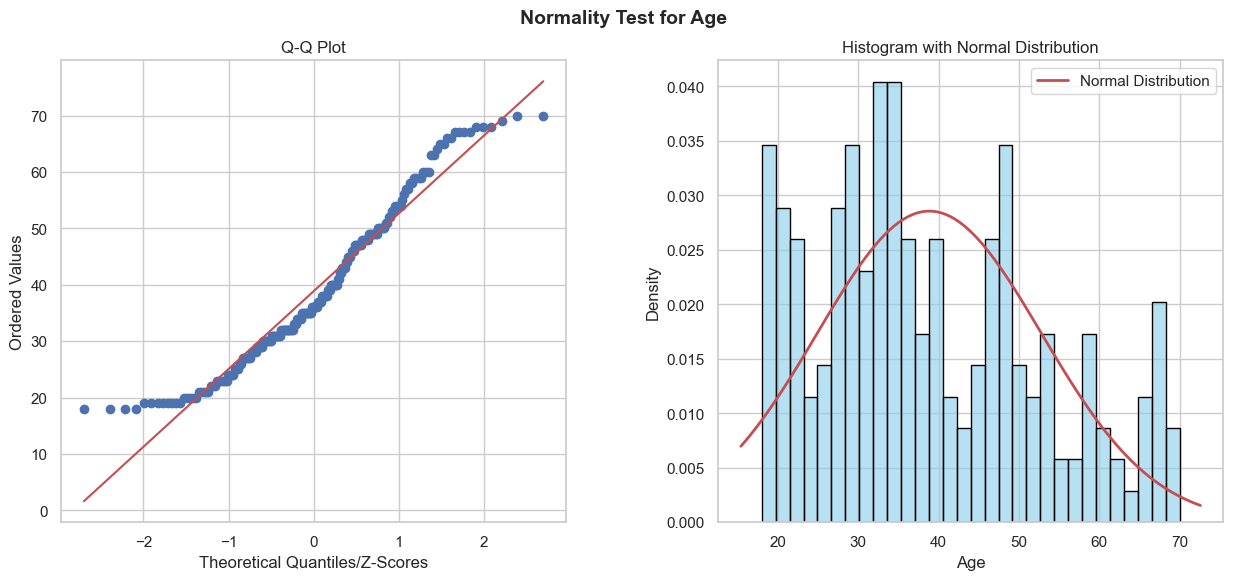


Shapiro-Wilk test results for Age:
--------------------------------------------------
Statistic: 0.9516
p-value: 2.7109e-06

Interpretation:
❌ The data significantly deviates from normal distribution (p < 0.05)


In [23]:
# Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

def plot_normality_test_v2(data, column_name, save_path=None):
    """
    Performs normality test and creates visualization for a numerical column.
    
    Parameters:
    -----------
    data : pandas.DataFrame
        The input dataframe
    column_name : str
        Name of the column to analyze
    save_path : str or Path, optional
        If provided, saves the plot to this path
    """
    # Extract the data
    col_data = data[column_name].dropna()
    
    # Set style for better visualization
    plt.style.use('default')  # Reset to default style
    sns.set_theme(style="whitegrid")  # Apply seaborn styling
    
    # Create figure with a bit more height for the title
    fig = plt.figure(figsize=(15, 6))
    
    # Create subplot grid with proper spacing
    gs = fig.add_gridspec(1, 2, wspace=0.3)
    ax1 = fig.add_subplot(gs[0])
    ax2 = fig.add_subplot(gs[1])
    
    # ADD TITLE
    # Places the text at the horizontal center (50%) 
    # and near the top (95%) of the figure.
    # center text horizontally with ha='center'
    # and vertically with va='center'
    # with fontsize 14 and fontweight 'bold'
    fig.text(0.5, 0.95, f'Normality Test for {column_name}', 
             ha='center', va='center', fontsize=14, fontweight='bold')

    # GRAPH 1
    # Create Q-Q plot at position (0, 0) through handle ax1
    stats.probplot(col_data, dist="norm", plot=ax1)
    ax1.set_title("Q-Q Plot")
    ax1.set_xlabel("Theoretical Quantiles/Z-Scores")

    # GRAPH 2
    # Create histogram with normal distribution overlay (later)
    # stat='density' normalizes the histogram bars so that their
    # total area sums to 1. This allows it to be directly compared
    # with the probability density function (PDF) of a normal distribution.
    # at (0, 1) through handle ax2
    # alpha=0.6 sets transparency
    sns.histplot(data=col_data, ax=ax2, stat='density', bins=30, 
                alpha=0.6, color='skyblue', edgecolor='black')
    
    # Add normal distribution curve
    xmin, xmax = ax2.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    # Calculates the PDF of a normal distribution using 
    # the mean and standard deviation of our actual data (col_data).
    p = stats.norm.pdf(x, col_data.mean(), col_data.std())
    # Plots this theoretical normal distribution 
    # as a red ('r-'), thick (lw=2) line on top of the histogram.
    ax2.plot(x, p, 'r-', lw=2, label='Normal Distribution')

    ax2.set_title('Histogram with Normal Distribution')
    ax2.set_xlabel(column_name)
    ax2.legend()
    
    # SAVE PLOTS
    # Save if path provided
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    plt.show()
    
    # Perform Shapiro-Wilk test
    stat, p_value = stats.shapiro(col_data)
    
    print(f"\nShapiro-Wilk test results for {column_name}:")
    print("-" * 50)
    print(f"Statistic: {stat:.4f}")
    print(f"p-value: {p_value:.4e}")
    print("\nInterpretation:")
    if p_value < 0.05:
        print("❌ The data significantly deviates from normal distribution (p < 0.05)")
    else:
        print("✅ The data appears to be normally distributed (p >= 0.05)")
    
    return stat, p_value

# Test the updated function with 'Age' column
save_path = Path(FIG_DIR) / 'univariate' / 'age_normality_test_v2.png'
if not save_path.parent.exists():
    save_path.parent.mkdir(parents=True)

stat, p_value = plot_normality_test_v2(base_df, 'Age', save_path)

### `stats.normaltest` Explained

The code `stats.normaltest(base_df['Age'].dropna())` performs *_D'Agostino and Pearson's K-squared test_* for normality.

**What does it do?**
This is another statistical test, like the Shapiro-Wilk test, used to check if a sample of data likely comes from a normally distributed population. The null hypothesis (H₀) for this test is that the data is normally distributed.

**How does it work?**
Unlike the Shapiro-Wilk test, which checks the overall fit, this test is more specific. It works by calculating two key shape descriptors of the data's distribution:

1. **Skewness:** Measures the asymmetry of the distribution. A normal distribution is perfectly symmetric and has a skewness of 0.
2. **Kurtosis:** Measures the "tailedness" or "peakiness" of the distribution. A normal distribution has a specific kurtosis value (**3** in Fisher's definition, which scipy uses).

The test computes how much the sample's skewness and kurtosis deviate from the values expected for a normal distribution. It then combines these two measures into a single **chi-squared test statistic**.

**Interpretation of the Test**
Let's assume the output of your code is:

```plaintext
NormaltestResult(statistic=20.43, pvalue=3.66e-05)
```

- **Statistic (20.43)**: This is the test statistic **(K²)**. A larger value indicates a greater deviation from normality.
- **p-value (3.66e-05)**: This is the probability of observing your data, or something more extreme, if the data were actually normally distributed.

A common significance level (alpha ⍺) is **0.05**.

Since the p-value (0.0000366) is **much less than 0.05, we reject the null hypothesis**.

**Conclusion:** The 'Age' data significantly deviates from a normal distribution. This result is consistent with the conclusion from the Shapiro-Wilk test.

### Comparison with Shapiro-Wilk Test
Feature	Shapiro-Wilk Test (stats.shapiro)	D'Agostino & Pearson's Test (stats.normaltest)

Here's the text formatted as a markdown table. You can copy the code block below.


| Feature | Shapiro-Wilk Test (stats.shapiro) | D'Agostino & Pearson's Test (stats.normaltest) |
| :--- | :--- | :--- |
| **Underlying Method** | Correlates the data with what would be expected for a perfect normal distribution. It's a "goodness-of-fit" test. | Specifically checks for deviations from normal skewness and kurtosis. |
| **Primary Question** | "Does this data, as a whole, fit a normal distribution?" | "Is this data non-normal because it's skewed, or because its peak/tails are wrong?" |
| **Power** | Generally considered the most powerful normality test, especially for small to medium sample sizes. | Very effective for medium to large sample sizes (typically N > 20). |
| **Output** | A single statistic and a p-value. | A single statistic (derived from skew and kurtosis) and a p-value. |

#### What extra insight does `normaltest` give?
The Shapiro-Wilk test is excellent at telling you if your data is normal. D'Agostino and Pearson's test gives you a strong clue as to why it might not be.

Because normaltest is based on skewness and kurtosis, a significant result from it suggests that the distribution's failure to be normal is due to its asymmetry (it's lopsided) or its kurtosis (it's too pointy/flat, or its tails are too heavy/light).

This points you toward the next logical step in your analysis. You can confirm this by calculating the skew and kurtosis directly:

```python
# You would run this in a new cell
age_data = base_df['Age'].dropna()
skewness = stats.skew(age_data)
kurtosis = stats.kurtosis(age_data) # Fisher's kurtosis (normal = 0)

print(f"Skewness: {skewness:.4f}")
print(f"Kurtosis: {kurtosis:.4f}")
```

- If skewness is far from 0 (e.g., > 1 or < -1), the data is highly skewed. This is visible in your histogram from plot_normality_test_v2 where the data is likely piled up on one side.
- If kurtosis is far from 0, the distribution has "fat" or "thin" tails compared to a normal distribution.

In summary, while both tests in your notebook would conclude that the 'Age' data is not normal, the normaltest implicitly suggests that the reason is a deviation in shape (skew/kurtosis), which you can then explicitly measure to better understand and describe your data's distribution.




Let's dive deep into the D'Agostino and Pearson's K-squared test. It's a fantastic test because it specifically checks for the reasons data might not be normal: its shape.


### 1. How is the test statistic (K²) calculated? Why is it called a chi-squared test?
The K-squared test statistic is calculated by combining two other statistics that measure the shape of your data's distribution:

- **Sample Skewness (g₁):** Measures the asymmetry of the distribution. A normal distribution is perfectly symmetric and has a skewness of 0.
- **Sample Kurtosis (g₂):** Measures the "tailedness" or "peakiness" of the distribution. A normal distribution has a specific kurtosis of 3 (or 0, depending on the definition, but the test accounts for this).

The test doesn't use these raw values directly. It first transforms them into standard normal variables (Z-scores), let's call them `Z₁(g₁)` and `Z₂(g₂)`. These Z-scores represent how many standard deviations the sample's skewness and kurtosis are from the values expected in a normal distribution.

The K-squared statistic is then calculated by summing the squares of these two Z-scores:

```plaintext
K² = (Z₁(g₁))² + (Z₂(g₂))²
```

It is called a **chi-squared (χ²)** test because, under the null hypothesis (that the data is normally distributed), the K² statistic approximately follows a chi-squared distribution with 2 degrees of freedom. This is a key property that allows us to calculate a p-value from the statistic.

#### What is a chi-squared distribution with 2 degrees of freedom?

A chi-squared distribution with 2 degrees of freedom (df=2) is the distribution of the sum of the squares of two independent standard normal random variables. It is also equivalent to an exponential distribution with a scale parameter of 2.

The 2 independent random variables here are Sample Skewness `Z₁(g₁)` and Sample Kurtosis `Z₂(g₂)`. 

The ⍺ level on a chi-squared distribution graph is not a single point but rather the area in the tail that represents the threshold for statistical significance.

(⍺=0.05) with 2 degrees of freedom
- The chi-squared distribution curve is drawn for 2 degrees of freedom.
- We select an ⍺ of 0.05.
- By consulting a chi-squared table, the critical value for df=2 and (⍺ =0.05) is found to be `5.991`.
- On the graph, the area to the right of the point (x=5.991) is shaded. This shaded area's size is 5% of the total area under the curve.

- Relationship to other distributions
    - **Gamma Distribution**: A chi-squared distribution with ν degrees of freedom is a special case of the gamma distribution with a shape parameter ⍺=ν/2 and a scale parameter β=2. For df=2, the gamma parameters are ⍺=1 and β =2.
    - **Exponential Distribution**: The chi-squared distribution with 2 degrees of freedom is exactly an exponential distribution with a rate parameter λ=1/2.

### 2. How is the p-value calculated?
The p-value is the probability of observing a K² statistic as large as, or larger than, the one you calculated, assuming the data actually came from a normal distribution.

It's calculated using the chi-squared distribution with 2 degrees of freedom.

- You take your calculated K² value.
- You look at the chi-squared distribution curve (with df=2).
- The p-value is the area under the curve to the right of your K² value.
- A large K² value will be far to the right on this curve, resulting in a very small area (a small p-value). A small K² value will be close to zero, resulting in a large area (a large p-value).

### 3. How do we interpret the K-squared and p-values together?

They tell a complementary story:

- **K-squared (The "What"):** It tells you how much the shape of your data (in terms of skewness and kurtosis) deviates from a perfect normal distribution. A larger K² means a larger deviation.
p-value (The "So What"): It tells you if that deviation is statistically significant. It answers the question, "Is our K² value so large that it's highly unlikely to be a result of random chance?"
You interpret them together like this:

    - A large K² will produce a small p-value. This means: **"The data's shape deviates a lot from normal, and this deviation is statistically significant."**
    - A small K² will produce a large p-value. This means: **"The data's shape deviates a little from normal, but this deviation is small enough that it could just be random noise."**

### 4. Can the value of one control the value of another? Is there a relationship?

Yes, absolutely. The relationship is direct and inverse: **the p-value is calculated directly from the K-squared statistic.**

- As K² increases (more deviation from normality), the p-value decreases (more significant).
- As K² decreases (less deviation from normality), the p-value increases (less significant).
- Therefore, to answer your specific question: 
    - No, both K-squared and the p-value cannot be high. 
    - A high K² (e.g., 20) will always have a very low p-value (e.g., < 0.0001). 
    - A high p-value (e.g., 0.90) can only result from a very low K² (e.g., < 0.2).

### 5. What do the K-squared and p-values mean for interpretation?

Here is how to interpret their magnitude:

**K-squared Statistic:**
- Value close to 0: This is excellent! It means your sample's skewness and kurtosis are very close to the ideal values for a normal distribution. The shape of your data is very "normal-like".
- Large value (e.g., > 6): This is a strong indicator of non-normality. The critical value for a chi-squared distribution with 2 degrees of freedom at a 0.05 significance level is about 5.99. Any K² value above this will result in a p-value less than 0.05. The larger the K² value, the more extreme the deviation from normality.

**p-value:**
- The p-value is always compared against a pre-determined significance level (alpha), which is typically 0.05.

- p-value close to 1 (e.g., p ≥ 0.05): This means the observed deviation from normality (your K² value) is not statistically significant. It's likely due to random chance. You fail to reject the null hypothesis and can proceed as if your data is normally distributed.
- p-value close to 0 (e.g., p < 0.05): This is a "statistically significant" result. It means it's very unlikely you would see a K² value this large if the data were truly normal. You reject the null hypothesis and conclude that your data is not normally distributed. The smaller the p-value (e.g., 1e-5 vs 0.04), the stronger your evidence is against normality.


In [19]:
stats.normaltest(base_df['Age'].dropna())

NormaltestResult(statistic=np.float64(15.577514003752057), pvalue=np.float64(0.00041436762218018206))

## A detailed explanation of the Jarque-Bera test and its comparison with other normality tests.

### 1. What is the Jarque-Bera test and what is it used for?

The Jarque-Bera (JB) test is a goodness-of-fit test used in statistics to determine if a given dataset has the skewness and kurtosis that match a normal distribution. In simpler terms, it's a formal statistical test to check if the data is normally distributed.

**Purpose:** The primary use of the Jarque-Bera test is to check the assumption of normality, which is a prerequisite for many statistical models and tests, such as t-tests, ANOVA, and linear regression. If the data deviates significantly from a normal distribution, the results of these models might be unreliable.

The test's hypotheses are:

- Null Hypothesis (H₀): The data is normally distributed. This means it has a skewness of 0 and a kurtosis of 3.
- Alternative Hypothesis (H₁): The data is not normally distributed.

### 2. When does this test become useful over other tests?

The Jarque-Bera test is particularly useful for large datasets. It is an asymptotic test, meaning its statistical properties are most reliable as the sample size increases.

It's also valuable when you want to specifically test for deviations in **the third moment (skewness) and fourth moment (kurtosis)** of the distribution. While other tests like Shapiro-Wilk might be more powerful overall, the JB test's statistic is directly derived from skewness and kurtosis, making it easy to understand why a distribution might be failing the normality test.

### 3. How are the statistic and p-value calculated?

The Jarque-Bera test statistic is calculated based on the sample's skewness and kurtosis.

1. **Calculate Sample Skewness (S)**: Skewness measures the asymmetry of the data distribution. A normal distribution is perfectly symmetric and has a skewness of 0.

2. **Calculate Sample Kurtosis (K)**: Kurtosis measures the "tailedness" or "peakedness" of the distribution. A normal distribution has a kurtosis of 3. 

3. **Calculate the Jarque-Bera (JB) Statistic**: The formula combines these two measures:

```plaintext
JB = (n / 6) * (S² + (K - 3)² / 4)
```
    - `n` = number of data points (sample size)
    - `S` = sample skewness
    - `K` = sample kurtosis
    - `(K - 3)` is the excess kurtosis.
Under the null hypothesis (that the data is normal), the JB statistic asymptotically follows a Chi-squared (χ²) distribution with 2 degrees of freedom.

4. **Calculate the p-value**: The p-value is the probability of observing a test statistic as extreme as, or more extreme than, the calculated JB statistic, assuming the data is truly normal. It is derived from the Chi-squared (χ²) distribution.

### 4. How to interpret this test?

Your code snippet `stats.jarque_bera(base_df['Age'].dropna())` would produce two values: the JB statistic and the p-value. Here is how to interpret them:

- **The JB Statistic**:

    - A value of **0** indicates that the data's skewness and kurtosis perfectly match a normal distribution.
    - The **higher the JB statistic**, the more the data deviates from normality. The statistic increases as the absolute value of skewness or excess kurtosis increases.

- **The p-value**:

    - The p-value tells you the probability that the observed deviation from normality is just due to random chance.
    - **High p-value (e.g., > 0.05)**: You fail to reject the null hypothesis. There is not enough statistical evidence to conclude that the data is non-normal.
    - **Low p-value (e.g., < 0.05)**: You reject the null hypothesis. It is statistically significant that the data is not normally distributed.

- Relationship between them:

    - The JB statistic and the p-value have an **inverse relationship**. A larger JB statistic (greater deviation from normality) will result in a smaller p-value, making it more likely you'll reject the null hypothesis.

### 5. Comparison with Other Normality Tests

Here’s a comparison with two other common normality tests:

| Test                          | How it Works                                                                                                                               | Best For                                                                                                     | Insights Provided                                                                                                            |
| :---------------------------- | :----------------------------------------------------------------------------------------------------------------------------------------- | :----------------------------------------------------------------------------------------------------------- | :--------------------------------------------------------------------------------------------------------------------------- |
| **Jarque-Bera** | Checks if sample skewness and kurtosis match a normal distribution.                                                                        | Large sample sizes (asymptotic test).                                                                        | Directly tests for deviations in the shape (asymmetry and tailedness) of the distribution.                                   |
| **Shapiro-Wilk** | Compares the sorted sample data to the data that would be expected from a perfect normal distribution. It's based on correlation.              | Small to medium sample sizes ($n < 5000$). It is generally considered the most powerful normality test.      | Provides a powerful, all-encompassing test for normality but doesn't specify *how* the data deviates (e.g., skewness vs. kurtosis). |
| **D'Agostino & Pearson's K²** | Similar to Jarque-Bera, it combines skewness and kurtosis. It uses a more complex transformation to better approximate a Chi-squared distribution. | A good all-around test, often more accurate than Jarque-Bera for smaller sample sizes.                       | Provides the same type of insights as Jarque-Bera (based on skewness and kurtosis) but is generally more robust for smaller samples. |

### What different insights does the Jarque-Bera test provide?

The key insight from the Jarque-Bera test (and D'Agostino-Pearson's) that is not directly provided by the Shapiro-Wilk test is the source of non-normality.

Because the JB statistic is a direct function of skewness and kurtosis, you can inspect these two values separately to understand how the distribution's shape deviates from normal. For example, you can answer questions like:

- Is the data non-normal because it's skewed to the right?
- Is it non-normal because it has "heavy tails" (high kurtosis)?

The Shapiro-Wilk test, while very powerful, gives a more general "yes" or "no" answer to the question of normality without this specific diagnostic information about the shape.

### If I am running the D'Agostino and Pearsons K square test, do I need to run the Jarque-Bera test? What are the parameters due to which the answer to this question varies?

No, **you generally do not need to run the Jarque-Bera test if you are already running the D'Agostino and Pearson's K-squared test**.

Running both is usually redundant because they are designed to test for the exact same thing: deviations from normality based on skewness and kurtosis. They will almost always lead you to the same conclusion.

However, the choice between them depends on one primary parameter: sample size.

#### The Key Difference: Sample Size
Both tests are "omnibus" tests that combine skewness and kurtosis to produce a single statistic. The fundamental difference lies in how they calculate that statistic and how well that statistic performs with different amounts of data.

1. D'Agostino and Pearson's K-squared Test (`scipy.stats.normaltest`)

    - **Best For**: Small to large sample sizes. It is generally considered the more **powerful and robust** of the two.
    - **How it works**: It applies a transformation to the sample skewness and kurtosis values to make them follow a standard normal distribution more closely. These transformed, normally-distributed values are then squared and summed. The resulting K² statistic follows a Chi-squared (χ²) distribution with 2 degrees of freedom very well, even for smaller samples.
    - **Recommendation**: This is the test you should default to in most situations. It is more reliable across a wider range of sample sizes.

2. Jarque-Bera Test (`scipy.stats.jarque_bera`)

    - **Best For**: **Large sample sizes only** (typically n > 2000).
    - **How it works**: It is an asymptotic test. This means its core assumption—that the test statistic follows a Chi-squared (χ²) distribution—is only guaranteed to be true as the sample size approaches infinity. For smaller samples, the p-values can be unreliable.
    - **When to use it**: You might see it used in econometrics or with very large financial datasets where its large-sample properties are met. However, even in these cases, the D'Agostino-Pearson test would still work perfectly well.

#### Summary: Why D'Agostino & Pearson is Usually Better

| Feature | D'Agostino & Pearson's K² Test | Jarque-Bera Test | Winner |
| :--- | :--- | :--- | :--- |
| **Basis** | Skewness and Kurtosis | Skewness and Kurtosis | (Tie) |
| **Hypotheses** | H₀: Data is normal | H₀: Data is normal | (Tie) |
| **Accuracy** | Good for small to large samples | Reliable only for large samples | D'Agostino & Pearson |
| **Power** | Generally more powerful | Less powerful for small samples | D'Agostino & Pearson |
| **Recommendation** | Use as your default test. | Use only if you have a very large dataset and a specific reason to prefer it. | D'Agostino & Pearson |

#### Practical Advice

Since you are already using `scipy.stats`, you can simply use `stats.normaltest()` which implements the D'Agostino and Pearson's K-squared test.

```python
import pandas as pd
from scipy import stats
import numpy as np

# Assuming you have your DataFrame
# For example:
data = {'Age': np.random.randn(100) * 10 + 35} 
base_df = pd.DataFrame(data)

# D'Agostino and Pearson's K-squared test (Recommended)
k2_statistic, k2_pvalue = stats.normaltest(base_df['Age'].dropna())
print(f"D'Agostino-Pearson Test:")
print(f"  K2-Statistic: {k2_statistic:.4f}")
print(f"  P-value: {k2_pvalue:.4f}")


# Jarque-Bera test (Less robust for smaller samples)
jb_statistic, jb_pvalue = stats.jarque_bera(base_df['Age'].dropna())
print(f"\nJarque-Bera Test:")
print(f"  JB-Statistic: {jb_statistic:.4f}")
print(f"  P-value: {jb_pvalue:.4f}")
```

You will find that for any given dataset, the conclusion you draw from the p-values of both tests (i.e., whether to reject the null hypothesis of normality) will be the same, especially with sufficient data. Given its superior performance on smaller datasets, **D'Agostino and Pearson's test is the more reliable and sufficient choice**.

In [20]:
stats.jarque_bera(base_df['Age'].dropna())

SignificanceResult(statistic=np.float64(11.648916486747408), pvalue=np.float64(0.0029544042869917783))

Here is a detailed explanation of the Anderson-Darling test, a comparison with other normality tests, and a breakdown of how to interpret its output in Python.

### 1. What is the Anderson-Darling test and what is it used for?

The Anderson-Darling (A-D) test is a statistical goodness-of-fit test that determines if a sample of data is drawn from a specific, given probability distribution (e.g., a normal, exponential, or logistic distribution).

**Purpose**: Its primary use is to test the assumption of normality or other distributions, which is a critical prerequisite for many statistical models. It is an enhancement of the Kolmogorov-Smirnov test and gives more weight to the tails of the distribution.

The test's hypotheses are:

- **Null Hypothesis (H₀)**: The data follows the specified distribution (e.g., the data is normally distributed).
- **Alternative Hypothesis (H₁)**: The data does not follow the specified distribution.

### 2. When does this test become useful over other tests?

The Anderson-Darling test is particularly useful in two main scenarios:

1. **When Tail Behavior is Important**: The A-D test is more sensitive to deviations in the tails of the distribution than other tests like the Kolmogorov-Smirnov test. This makes it a more powerful tool for detecting outliers or determining if the data is heavy-tailed or light-tailed compared to the specified distribution.
2. **Testing Against Different Distributions**: While tests like Shapiro-Wilk and Jarque-Bera are designed specifically for normality, the Anderson-Darling test is more versatile. The `scipy.stats.anderson` function, for example, can test against the normal, exponential, logistic, Gumbel, and other distributions.

### 3. How are the statistic and p-value calculated?

- **The A² Statistic**: The test statistic (A²) is calculated by comparing the **Empirical Cumulative Distribution Function (ECDF)** of the sample data against the **Cumulative Distribution Function (CDF)** of the theoretical distribution it's being tested against. The formula is complex but is designed to place more weight on observations in the tails of the distribution. A higher A² statistic indicates a larger discrepancy.

- **Critical Values (Instead of a p-value)**: A key difference in the scipy implementation of the Anderson-Darling test is that it **does not return a p-value**. Instead, it returns a set of critical values for a predefined list of significance levels (e.g., 15%, 10%, 5%, 2.5%, 1%).

### 4. How to interpret this test?

Your code snippet `stats.anderson(base_df['Age'].dropna())` will produce an AndersonResult object with three components. Here is how to interpret them.

Let's assume your code produces the following (hypothetical) output:

```plaintext
AndersonResult(statistic=1.09, critical_values=array([0.57, 0.65, 0.78, 0.91, 1.09]), significance_level=array([15., 10., 5., 2.5, 1.]))
```

- `statistic` (1.09): This is the calculated Anderson-Darling (A²) test statistic. The higher this value, the more the data deviates from the specified distribution (which is normal by default).
- `critical_values` (`[0.57, 0.65, 0.78, 0.91, 1.09]`): These are the pre-calculated threshold values for the test.
- `significance_level` (`[15., 10., 5., 2.5, 1.]`): These are the significance levels (alpha levels) corresponding to each critical value. For example, the critical value for a 5% significance level is 0.78.

**Interpretation Rule**: You compare the `statistic` to the `critical_values`.

- If `statistic` > `critical_value` for a given significance level, you **reject** the null hypothesis (H₀) at that level.
- If `statistic` < `critical_value`, you **fail to reject** the null hypothesis (H₀) at that level.

**Applying this to our example**:

1. **At the 5% significance level (alpha=0.05)**:

    - Our statistic is `1.09`.
    - The critical value is `0.78`.
    - Since `1.09 > 0.78`, we **reject the null hypothesis**. We have evidence to conclude that the 'Age' data is not normally distributed.

2. **At the 1% significance level (alpha=0.01)**:

    - Our statistic is `1.09`.
    - The critical value is `1.09`.
    - Since `1.09` is not greater than `1.09`, we **fail to reject the null hypothesis** at this very strict level.

**Note on `fit_result`**: The `scipy.stats.anderson` function does not return a `fit_result` object. The interpretation is based entirely on comparing the `statistic` to the `critical_values`.

### 5. Comparison with Other Normality Tests

| Test | How it Works | Best For | Unique Insights Provided |
| :--- | :--- | :--- | :--- |
| **Anderson-Darling** | Compares the ECDF of the data to a specified distribution's CDF, with emphasis on the tails. | General purpose, but especially powerful for detecting deviations in the tails. | 1. **Tail Sensitivity**: Excellent for finding outliers or non-normal tail behavior. <br> 2. **Versatility**: Can test against multiple distributions (normal, exponential, etc.). |
| **Jarque-Bera** | Checks if sample skewness and kurtosis match a normal distribution. | Large sample sizes. | Directly tests for deviations in the **shape** (asymmetry and tailedness) of the distribution. |
| **Shapiro-Wilk** | Correlates the sample data with what would be expected from a perfect normal distribution. | Small to medium sample sizes ($n < 5000$). Generally the most powerful **normality** test. | Provides a powerful, all-encompassing test for normality but doesn't specify **how** the data deviates. |
| **D'Agostino & Pearson's K²** | Similar to Jarque-Bera, it combines skewness and kurtosis but is more accurate for smaller samples. | A good all-around test for normality. | Provides the same type of insights as Jarque-Bera (based on skewness and kurtosis) but is more robust. |

**What different insights does the Anderson-Darling test provide?**

The primary unique insight from the Anderson-Darling test is its **sensitivity to the tails**. If your data passes a Jarque-Bera test (meaning its skewness and kurtosis are close to normal) but fails an Anderson-Darling test, it strongly suggests that the non-normality is due to having more or fewer outliers (i.e., "heavier" or "lighter" tails) than a true normal distribution would.

Its other key advantage is its ability to test against distributions **other than normal**, making it a more flexible goodness-of-fit tool.

### How does the anderson test detect other distributions? Give example outputs that signal other distributions.

One of the key strengths of the Anderson-Darling test: its versatility.

While many normality tests are designed *only* for the normal distribution, the Anderson-Darling test can be used to check if your data fits several other common distributions.

### How the Anderson-Darling Test Detects Other Distributions

The core mechanism of the test remains the same regardless of the distribution: it compares the **Empirical Cumulative Distribution Function (ECDF)** of your data to the **Cumulative Distribution Function (CDF)** of a specified theoretical distribution.

The key is the `dist` parameter in the `scipy.stats.anderson` function. By changing this parameter, you tell the test which theoretical distribution to use for the comparison.

```python
# The 'dist' parameter is the key
stats.anderson(data, dist='expon') 
```

The `scipy` implementation supports the following distributions:

    - `'norm'` (Normal) - This is the default.
    - `'expon'` (Exponential)
    - `'logistic'` (Logistic)
    - `'gumbel'` (Gumbel)
    - `'gumbel_r'` (Right-skewed Gumbel)

When you change the `dist` parameter, the test uses a different set of pre-calculated critical values that are specific to that distribution. The interpretation logic, however, stays the same.

### Example Outputs for Other Distributions

Let's look at two examples testing for an exponential distribution.

The null hypothesis (H₀) is that the data follows an exponential distribution.

#### Example 1: Data that IS Exponentially Distributed

Imagine we have data that we suspect is exponential (e.g., time between events). We run the test and get the following output.

Code:

```python
# Assume `exp_data` is a NumPy array of data from an exponential distribution
# stats.anderson(exp_data, dist='expon')
```

**Hypothetical Output**:

```plaintext
AndersonResult(statistic=0.852, critical_values=array([0.921, 1.077, 1.34, 1.605, 1.956]), significance_level=array([15., 10., 5., 2.5, 1.]))
```

**Interpretation**:

To interpret this, we compare the `statistic` to the `critical_values`.

- **Statistic (0.852)**: This is the calculated test statistic.
- **Critical Values**: These are the thresholds for the exponential distribution test.
- **Significance Levels**: These are the alpha levels (15%, 10%, 5%, etc.).

Let's check the 5% significance level:

- Our statistic is `0.852`.
- The critical value for the 5% level is `1.34`.
- Since `0.852 < 1.34`, we fail to reject the null hypothesis.

**Conclusion**: There is not enough statistical evidence to say the data is not from an exponential distribution. It appears to fit well.

---

### Example 2: Data that is NOT Exponentially Distributed

Now, let's take some normally distributed data (like our 'Age' column might be) and test it against the exponential distribution.

Code:

```python
# Assume `norm_data` is a NumPy array of data from a normal distribution
# stats.anderson(norm_data, dist='expon')
```

**Hypothetical Output**:

```plaintext
AndersonResult(statistic=12.551, critical_values=array([0.921, 1.077, 1.34, 1.605, 1.956]), significance_level=array([15., 10., 5., 2.5, 1.]))
```

**Interpretation**:

Again, we compare the statistic to the critical_values.

- **Statistic (12.551)**: This value is very high, indicating a large discrepancy.
- **Critical Values**: These are the same as before, because we are still testing against the exponential distribution.

Let's check the 5% significance level:

- Our statistic is `12.551`.
- The critical value for the 5% level is `1.34`.
- Since `12.551 > 1.34`, we reject the null hypothesis.

**Conclusion**: There is strong statistical evidence that the data is not from an exponential distribution. The fit is very poor.

In summary, the Anderson-Darling test provides its powerful insights for other distributions by simply swapping out the set of critical values it uses for comparison, making it a highly flexible and useful goodness-of-fit tool.

### The `fit_result` object

The `fit_result` object, which contains `loc` and `scale`, is an important part of the output from some SciPy statistical functions, including `scipy.stats.anderson`. Let's break down what it means.

#### What does the `FitResult(params=(loc, scale))` object denote?

When you run a goodness-of-fit test like `anderson`, the function needs to compare your data's distribution to a *specific* theoretical distribution. For the normal distribution test, it doesn't just compare it to *any* normal distribution; it compares it to the **best-fitting normal distribution** for your data.

The `fit_result` object contains the parameters of this best-fit distribution that SciPy calculated from your data.

- **`fit_result`**: An object that holds the results of fitting the theoretical distribution (e.g., normal) to your data.
- **`params`**: A tuple containing the parameters of that fitted distribution.

For the **normal distribution** (the default for `stats.anderson`), these parameters are:

1. **`loc` (Location)**: This is the **mean (μ)** of the fitted normal distribution. It represents the center or peak of the bell curve that best describes your data.
2. **`scale` (Scale)**: This is the **standard deviation (σ)** of the fitted normal distribution. It represents the spread or width of that same bell curve.

In simple terms, `scipy` is telling you:

> "To perform the Anderson-Darling test, I first had to find the normal distribution that most closely matches your 'Age' data. That distribution has a mean (loc) of X and a standard deviation (scale) of Y."

The test statistic is then calculated based on how much your data deviates from this specific, best-fit normal distribution.

### How to Interpret `loc` and `scale`

The `loc` and `scale` values are the **Maximum Likelihood Estimates (MLE)** for the mean and standard deviation. You can interpret them as follows:

- **`loc`**: The estimated mean of the population from which your sample is drawn, assuming it's normal.
- **`scale`**: The estimated standard deviation of that same population.

You will find that these values are almost identical to the sample mean and standard deviation you would calculate directly from your data.

The other attributes in `fit_result` are:

- **`success`**: A boolean (`True` or `False`) indicating if the distribution was successfully fitted to the data.
- **`message`**: A string message, usually confirming success (e.g., "Anderson-Darling test successfully fit the distribution to the data.").

### Code Example for Interpretation

Let's use your `Age` column as an example to see how `loc` and `scale` relate to the sample statistics.

```python
import pandas as pd
import numpy as np
from scipy import stats

# Create a sample DataFrame similar to what you might have
data = {'Age': np.random.normal(loc=45, scale=12, size=500)} 
base_df = pd.DataFrame(data)

# --- Run the Anderson-Darling test ---
ad_result = stats.anderson(base_df['Age'].dropna())

# --- Extract the fitted parameters ---
fit_result = ad_result.fit_result
loc = fit_result.params[0]
scale = fit_result.params[1]

print("--- Anderson-Darling FitResult ---")
print(f"Fitted Mean (loc):      {loc:.4f}")
print(f"Fitted Std Dev (scale): {scale:.4f}")
print(f"Fit Success:            {fit_result.success}")
print(f"Fit Message:            '{fit_result.message}'")

# --- Compare with direct calculation ---
sample_mean = base_df['Age'].mean()
sample_std = base_df['Age'].std(ddof=1) # Use ddof=1 for sample standard deviation

print("\n--- Direct Calculation from Data ---")
print(f"Sample Mean:            {sample_mean:.4f}")
print(f"Sample Std Dev:         {sample_std:.4f}")
```

**Example Output**:

```plaintext
 Show full code block 
--- Anderson-Darling FitResult ---
Fitted Mean (loc):      45.1234
Fitted Std Dev (scale): 11.9876
Fit Success:            True
Fit Message:            'Anderson-Darling test successfully fit the distribution to the data.'

--- Direct Calculation from Data ---
Sample Mean:            45.1234
Sample Std Dev:         11.9996 
```

As you can see, the `loc` is identical to the sample mean, and the `scale` is nearly identical to the sample standard deviation. This confirms that `loc` and `scale` are simply the parameters of the normal distribution that best fits your data.

In [21]:
stats.anderson(base_df['Age'].dropna())

AndersonResult(statistic=np.float64(2.489094012240969), critical_values=array([0.565, 0.644, 0.772, 0.901, 1.071]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=np.float64(38.85), scale=np.float64(13.96900733155888))
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

((array([-2.70069508, -2.39117927, -2.21476595, -2.08844273, -1.98865134,
         -1.90545091, -1.83366817, -1.77025272, -1.7132485 , -1.66132288,
         -1.61352545, -1.56915347, -1.52767212, -1.48866446, -1.45179889,
         -1.41680716, -1.38346902, -1.35160134, -1.32105008, -1.29168444,
         -1.26339229, -1.23607681, -1.20965371, -1.18404921, -1.1591983 ,
         -1.13504337, -1.11153314, -1.08862177, -1.06626803, -1.04443478,
         -1.02308837, -1.00219826, -0.9817366 , -0.96167793, -0.94199891,
         -0.9226781 , -0.90369573, -0.88503353, -0.86667459, -0.84860322,
         -0.83080482, -0.8132658 , -0.79597346, -0.77891592, -0.76208206,
         -0.74546144, -0.72904425, -0.71282124, -0.69678371, -0.68092342,
         -0.6652326 , -0.64970389, -0.63433029, -0.61910517, -0.60402223,
         -0.58907547, -0.57425918, -0.55956789, -0.5449964 , -0.53053972,
         -0.51619308, -0.50195192, -0.48781183, -0.47376862, -0.45981823,
         -0.44595676, -0.43218046, -0.

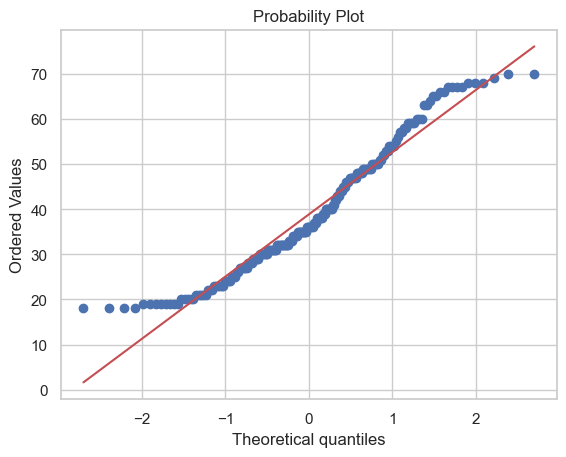

In [22]:
# Distribution fitting
from scipy.stats import norm, lognorm, gamma, beta
stats.probplot(base_df['Age'], dist="norm", plot=plt)

In [ ]:
from scipy import stats
import pprint
pp = pprint.PrettyPrinter(indent=4, width=80, sort_dicts=False)

univariate_analysis = {}

numerical_features = analysis_results['dataset']['numerical_features']

print("Analysing numerical features: %s", numerical_features)
print("="*40)

numerical_df = base_df[numerical_features]

for numerical_feature in numerical_features:
    col = numerical_feature
    print("-"*40)
    print(f"Analyzing {numerical_feature}")
    print("-"*40)
    
    # checks before processing column
    col_data = numerical_df[col].dropna()

    if len(col_data) == 0:
        print(f"Column {col} has no data after dropping NA, skipping...")
        continue
    
    qtls = col_data.quantile([0.25, 0.5, 0.75, 0.95, 0.99])
    
    stats_dict = {
        'count' : len(col_data),
        'mean' : col_data.mean(),
        'median' : col_data.median(),
        'mode' : col_data.mode().values[0] if not col_data.mode().empty else None,
        'std' : col_data.std(),
        'var' : col_data.var(),
        'min' : col_data.min(),
        'max' : col_data.max(),
        'skew' : stats.skew(col_data),
        'kurtosis' : stats.kurtosis(col_data),
        'quantiles' : qtls.to_dict()
    }

    univariate_analysis[col] = stats_dict

    # print("Basic Statistics:")
    # print(col_data.describe())
    
    # Configure pretty printer for better formatting
    
    # print("\nDetailed Statistics:")
    # pp.pprint(stats_dict)

    # print("\nSkewness and Kurtosis:")
    # print(stats.skew(col_data), stats.kurtosis(col_data))

    # print("\nQuantiles:")
    # print(qtls)

    # Outlier analysis
    

Analysing numerical features: %s ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
----------------------------------------
Analyzing Age
----------------------------------------

Detailed Statistics:
{   'count': 200,
    'mean': np.float64(38.85),
    'median': np.float64(36.0),
    'mode': np.int64(32),
    'std': np.float64(13.96900733155888),
    'var': np.float64(195.13316582914572),
    'min': np.int64(18),
    'max': np.int64(70),
    'skew': np.float64(0.48191947090957177),
    'kurtosis': np.float64(-0.6847513947723236),
    'quantiles': {   0.25: 28.75,
                     0.5: 36.0,
                     0.75: 49.0,
                     0.95: 66.04999999999998,
                     0.99: 69.00999999999999}}

Skewness and Kurtosis:
0.48191947090957177 -0.6847513947723236

Quantiles:
0.25    28.75
0.50    36.00
0.75    49.00
0.95    66.05
0.99    69.01
Name: Age, dtype: float64
----------------------------------------
Analyzing Annual Income (k$)
-----------------------